In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [2]:
# train and test data
train_data=pd.read_csv(r'C:\Users\User\Desktop\ms\Problem HR Analytics\train_LZdllcl.csv')
test_data=pd.read_csv(r'C:\Users\User\Desktop\ms\Problem HR Analytics\test_2umaH9m.csv')

In [3]:
train_data.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [4]:
test_data.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


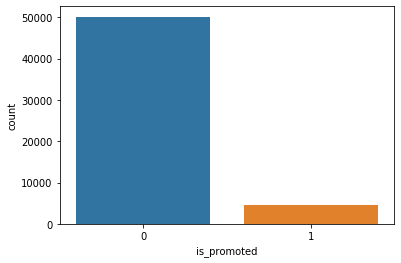

In [6]:
# distribution of trage variable
train_data['is_promoted'].value_counts()

sns.countplot(train_data['is_promoted'])

In [7]:
train_data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

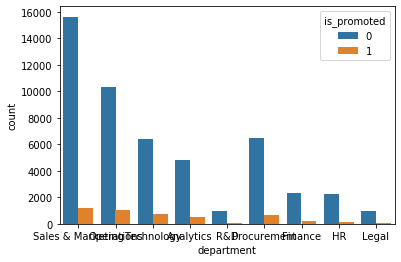

In [8]:
# distribution of 'department' variable
sns.countplot(x='department',hue='is_promoted',data=train_data)

In [9]:
train_data['department']=train_data['department'].replace(['Technology','Procurement','Analytics','Operations','Finance','Sales & Marketing','R&D','HR','Legal'],
                                                          [9,8,7,6,5,4,3,2,1])
test_data['department']=test_data['department'].replace(['Technology','Procurement','Analytics','Operations','Finance','Sales & Marketing','R&D','HR','Legal'],
                                                          [9,8,7,6,5,4,3,2,1])

In [10]:
# sparte text and number from region column train data
train_data['region']=pd.DataFrame(train_data['region'])
train_data[['First','region1']] = train_data.region.str.split("_",expand=True) 
train_data['region1']=pd.to_numeric(train_data['region1'])

# sparte text and number from region column train data
test_data['region']=pd.DataFrame(test_data['region'])
test_data[['First','region1']] = test_data.region.str.split("_",expand=True) 
test_data['region1']=pd.to_numeric(test_data['region1'])

In [11]:
# drop 'First','region','employee_id' columns
train_data1=train_data.drop(columns=['First','region','employee_id'])

test_data1=test_data.drop(columns=['First','region','employee_id'])

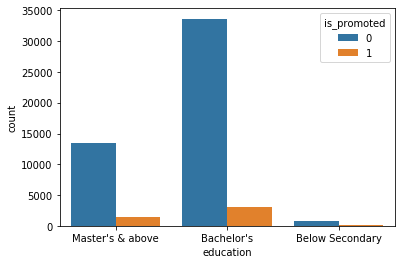

In [12]:
# distribution of 'education variable
sns.countplot(x='education',hue='is_promoted',data=train_data1)

In [13]:
# filling missing value 
train_data1['education']=train_data1['education'].fillna("Bachelor's")

test_data1['education']=test_data1['education'].fillna("Bachelor's")

In [14]:
train_data1['education']=train_data1['education'].replace(["Bachelor's","Master's & above","Below Secondary"],[3,2,1])

test_data1['education']=test_data1['education'].replace(["Bachelor's","Master's & above","Below Secondary"],[3,2,1])

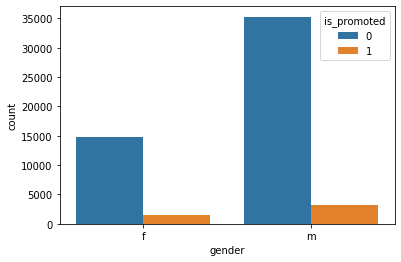

In [15]:
# distribution of gender variable
sns.countplot(x='gender',hue='is_promoted',data=train_data1)

In [16]:
train_data1['gender']=train_data1['gender'].replace(["f","m"],[2,1])

test_data1['gender']=test_data1['gender'].replace(["f","m"],[2,1])

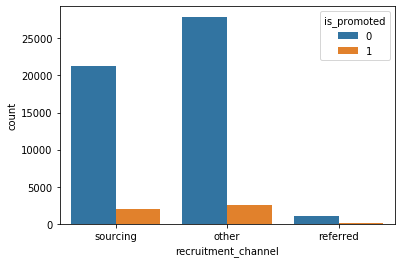

In [17]:
# distribution of recruitment_channel variable
sns.countplot(x='recruitment_channel',hue='is_promoted',data=train_data1)

In [18]:
train_data1['recruitment_channel']=train_data1['recruitment_channel'].replace(["referred","sourcing","other"],[3,2,1])

test_data1['recruitment_channel']=test_data1['recruitment_channel'].replace(["referred","sourcing","other"],[3,2,1])

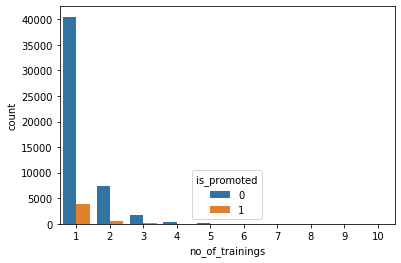

In [19]:
# distribution of no of training variable
sns.countplot(x='no_of_trainings',hue='is_promoted',data=train_data1)

In [20]:
# convert age into bins
bin=[10,20,30,40,50,60]
label=[15,25,35,45,55]
train_data1['age_range'] = pd.cut(train_data1['age'],bins= bin,labels=label)
train_data1['age_range']=pd.to_numeric(train_data1['age_range'])

test_data1['age_range'] = pd.cut(test_data1['age'],bins= bin,labels=label)
test_data1['age_range']=pd.to_numeric(test_data1['age_range'])

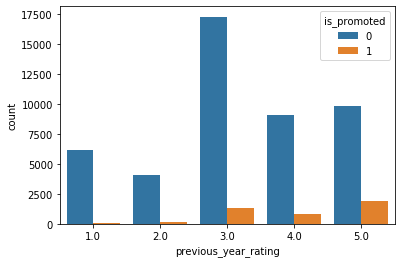

In [21]:
# distribution of previous_year_rating variable
sns.countplot(x='previous_year_rating',hue='is_promoted',data=train_data1)

In [22]:
train_data1['previous_year_rating']=train_data1['previous_year_rating'].fillna(0)

test_data1['previous_year_rating']=test_data1['previous_year_rating'].fillna(0)

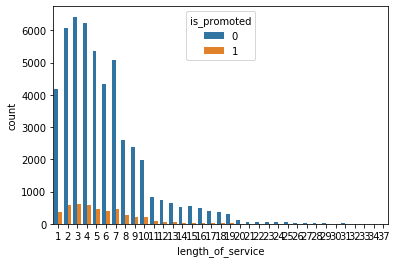

In [23]:
# distribution of length_of_service variable
sns.countplot(x='length_of_service',hue='is_promoted',data=train_data1)

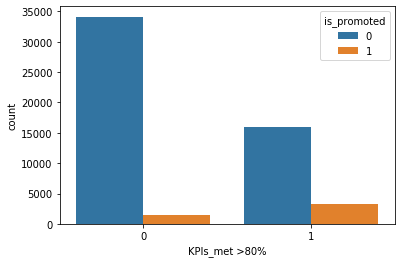

In [24]:
# distribution of KPIs_met >80%  variable
sns.countplot(x='KPIs_met >80%',hue='is_promoted',data=train_data1)

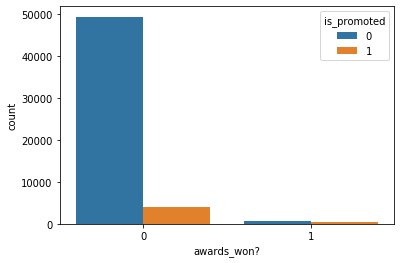

In [25]:
# distribution of awards_won?  variable
sns.countplot(x='awards_won?',hue='is_promoted',data=train_data1)

In [26]:
y=train_data1.iloc[:,11]
x=train_data1.drop(columns=["is_promoted"])

In [27]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [48]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(estimator=ExtraTreesClassifier(), 
           k_features=(5,12),
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=5)
sfs1.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=ExtraTreesClassifier(bootstrap=False,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                        

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28607ac08>)

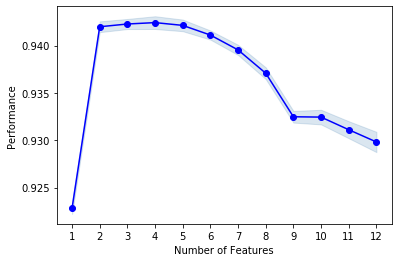

In [348]:
plot_sfs(sfs1.get_metric_dict(), kind='std_err')

In [28]:
sfs1.k_feature_names_

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'region1',
       'age_range'],
      dtype='object')

In [32]:
fl=['department','no_of_trainings','KPIs_met >80%', 'awards_won?', 'avg_training_score']

In [33]:
xb=x.loc[:,fl]

test_data2=test_data1.loc[:,fl]

In [34]:
#split data into train test by sample size .2
X_train, X_test, y_train, y_test = train_test_split(xb,y, test_size=0.2)

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=.25)
xb1,y = sm.fit_sample(xb,y)

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =200,max_depth=20, min_samples_split=5)
classifier.fit(xb1,y)
pred1=classifier.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[9961  101]
 [ 552  348]]
0.93112577768771


In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=10, min_samples_split=7)
clf.fit(xb1,y)
pred1=clf.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[9995   67]
 [ 580  320]]
0.9299483758481909


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=0,n_estimators=1000)
gbc.fit(xb1,y)
pred1=gbc.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[9989   73]
 [ 578  322]]
0.9297606130621588


In [44]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=5,n_estimator=100,learning_rate=0.2, scale_pos_weight=2.5)
xgb_model.fit(xb1,y)
pred1=xgb_model.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[8066 1996]
 [ 204  696]]
0.8395591347814434


In [41]:
from lightgbm import LGBMClassifier
lgb= LGBMClassifier(n_estimators=100, max_depth=-1, learning_rate=0.1)
lgb.fit(xb1,y)
pred1=lgb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[10010    52]
 [  583   317]]
0.9306976554861441


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(xb1,y)
pred1 = etc.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))


[[9965   97]
 [ 553  347]]
0.9313020716144773


In [ ]:
from sklearn.ensemble import VotingClassifier
estim=[('lgb',lgb),('xgb',xgb_model),('etc',etc),('classifier',classifier),('gbc',gbc)]
vt=VotingClassifier(estimators=estim,voting="soft",weights=[1,2,1,1,1])
vt.fit(xb1,y)
pred1=vt.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

In [54]:
#submission file
pred=vt.predict(test_data2)
pred_sub=pd.DataFrame(pred,columns=["is_promoted"])
final_data=pd.DataFrame(pd.concat([test_data.iloc[:,0],pred_sub],axis=1))
final_data.to_csv(r'C:\Users\User\Downloads\HR Analytics_pred.csv',index=False) 